In [ ]:
#assignment 3

Image Size: 420x746, Channels: 3
Total Pixels: 313320
Black Pixel Count: 238649


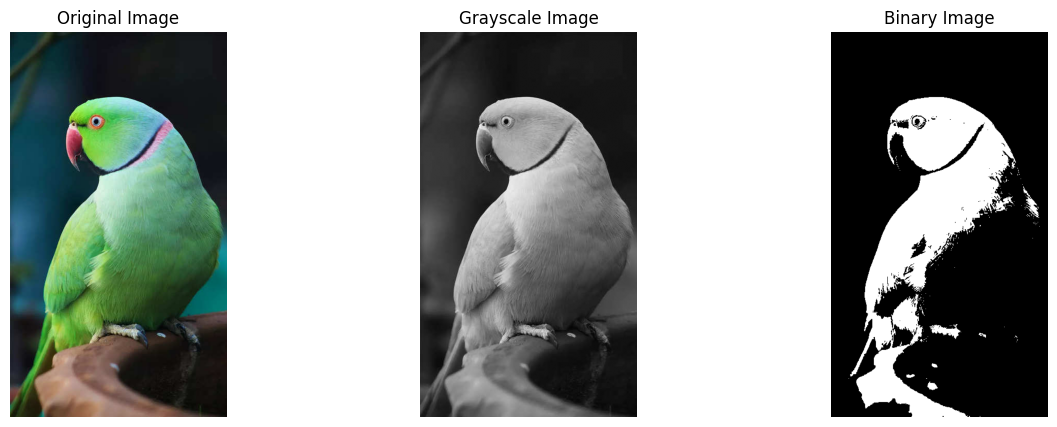

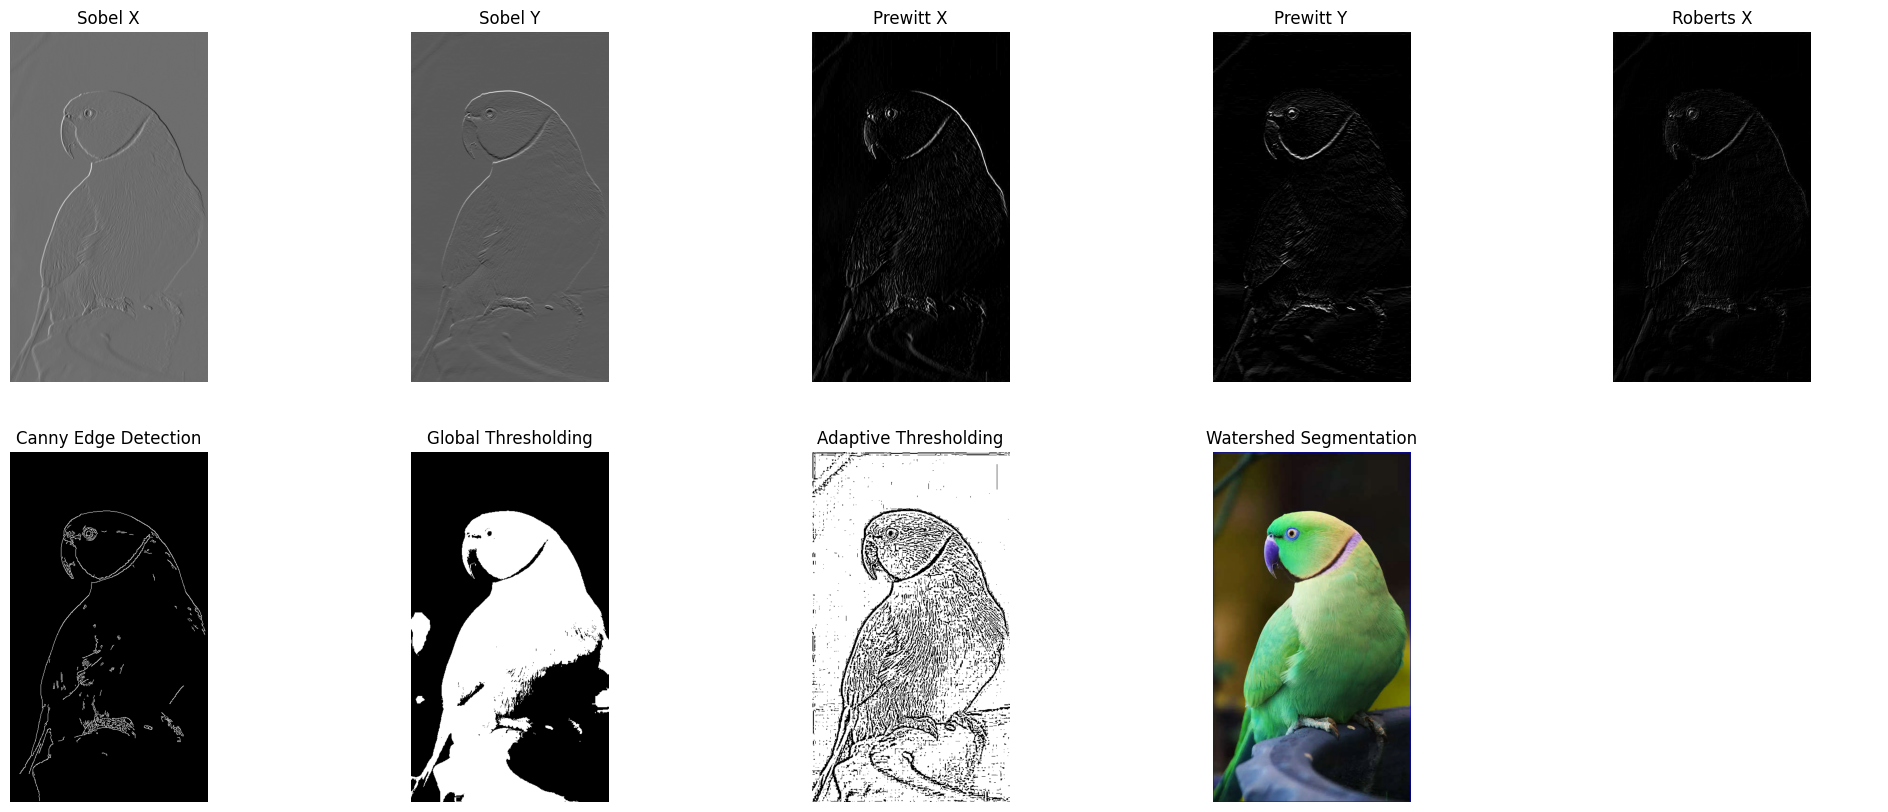

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def task1_image_manipulation(image_path):

    image_bgr = cv2.imread(image_path)


    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)


    height, width, channels = image_rgb.shape
    print(f"Image Size: {width}x{height}, Channels: {channels}")


    total_pixels = height * width
    print(f"Total Pixels: {total_pixels}")


    image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("grayscale_image.jpg", image_gray)


    _, image_binary = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)
    cv2.imwrite("binary_image.jpg", image_binary)


    black_pixel_count = np.sum(image_binary == 0)
    print(f"Black Pixel Count: {black_pixel_count}")


    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(image_rgb)
    ax[0].set_title("Original Image")
    ax[1].imshow(image_gray, cmap='gray')
    ax[1].set_title("Grayscale Image")
    ax[2].imshow(image_binary, cmap='gray')
    ax[2].set_title("Binary Image")

    for a in ax:
        a.axis("off")
    plt.show()


def task2_edge_detection_and_segmentation(image_path):
    image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


    sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)
    prewitt_x = cv2.filter2D(image_gray, -1, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
    prewitt_y = cv2.filter2D(image_gray, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
    roberts_x = cv2.filter2D(image_gray, -1, np.array([[1, 0], [0, -1]]))
    roberts_y = cv2.filter2D(image_gray, -1, np.array([[0, 1], [-1, 0]]))
    canny_edges = cv2.Canny(image_gray, 100, 200)


    _, global_thresh = cv2.threshold(image_gray, 80, 255, cv2.THRESH_BINARY,cv2.THRESH_OTSU)
    adaptive_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


    image_bgr = cv2.imread(image_path)
    gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = np.ones((3, 3), np.uint8)
    sure_bg = cv2.dilate(binary, kernel, iterations=3)
    dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    unknown = cv2.subtract(sure_bg, sure_fg.astype(np.uint8))
    markers = cv2.connectedComponents(unknown)[1]
    markers += 1
    markers[unknown == 255] = 0
    markers = cv2.watershed(image_bgr, markers)
    image_bgr[markers == -1] = [0, 0, 255]

    fig, ax = plt.subplots(2, 5, figsize=(25, 10))
    ax[0, 0].imshow(sobel_x, cmap='gray'); ax[0, 0].set_title("Sobel X")
    ax[0, 1].imshow(sobel_y, cmap='gray'); ax[0, 1].set_title("Sobel Y")
    ax[0, 2].imshow(prewitt_x, cmap='gray'); ax[0, 2].set_title("Prewitt X")
    ax[0, 3].imshow(prewitt_y, cmap='gray'); ax[0, 3].set_title("Prewitt Y")
    ax[0, 4].imshow(roberts_x, cmap='gray'); ax[0, 4].set_title("Roberts X")
    ax[1, 0].imshow(canny_edges, cmap='gray'); ax[1, 0].set_title("Canny Edge Detection")
    ax[1, 1].imshow(global_thresh, cmap='gray'); ax[1, 1].set_title("Global Thresholding")
    ax[1, 2].imshow(adaptive_thresh, cmap='gray'); ax[1, 2].set_title("Adaptive Thresholding")
    ax[1, 3].imshow(image_bgr); ax[1, 3].set_title("Watershed Segmentation")

    for row in ax:
        for a in row:
            a.axis("off")
    plt.show()

task1_image_manipulation("/content/image.jpg")
task2_edge_detection_and_segmentation("/content/image.jpg")
